In [1]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

from sklearn import metrics


titanic_data = pd.read_csv('/Users/vishruta/Desktop/Blackboard/Fall 2020/Predictive Analytics/WEEK 3/titanic.csv')
titanic_data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [2]:
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

### Data Cleaning

<Figure size 432x288 with 0 Axes>

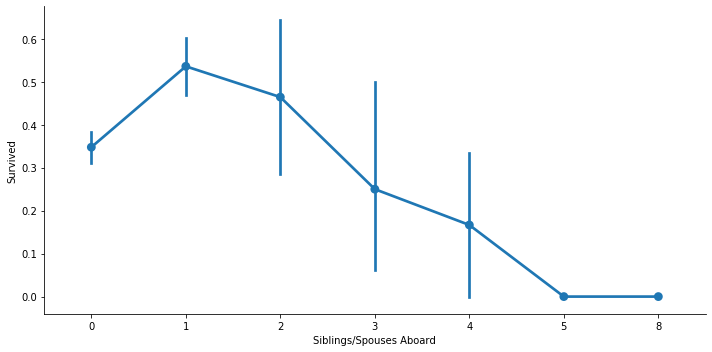

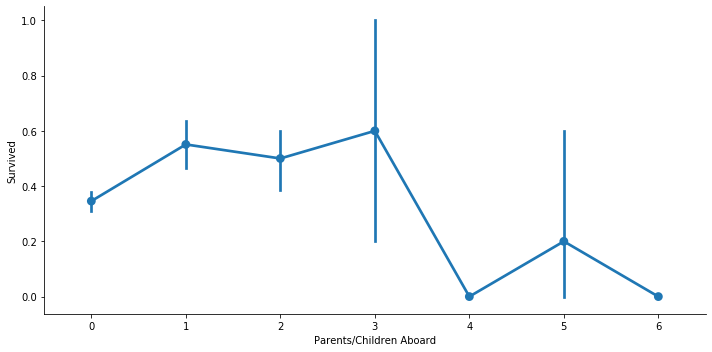

In [3]:
for i, col in enumerate(['Siblings/Spouses Aboard', 'Parents/Children Aboard']):
    plt.figure(i)
    sns.catplot(x=col, y= 'Survived', data= titanic_data, kind='point', aspect=2)

In [4]:
## Combined Siblings/Spouse and Parent/Children into one column as Family_Cnt

titanic_data['Family_cnt'] = titanic_data['Siblings/Spouses Aboard'] + titanic_data['Parents/Children Aboard']
titanic_data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family_cnt
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,0
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,0
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,3
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,0


In [5]:
titanic_data['Family_cnt'].value_counts()

0     533
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_cnt, dtype: int64

In [6]:
titanic_data.drop(['Siblings/Spouses Aboard','Parents/Children Aboard','Name'], axis = 1, inplace=True)
titanic_data

,Survived,Pclass,Sex,Age,Fare,Family_cnt
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,1
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,1
4,0,3,male,35.0,8.0500,0
...,...,...,...,...,...,...
882,0,2,male,27.0,13.0000,0
883,1,1,female,19.0,30.0000,0
884,0,3,female,7.0,23.4500,3
885,1,1,male,26.0,30.0000,0


In [7]:
## Categorical Variables to Numerical variable

gender = {'male' : 0 , 'female' : 1}
titanic_data['Sex'] = titanic_data['Sex'].map(gender)
titanic_data

,Survived,Pclass,Sex,Age,Fare,Family_cnt
0,0,3,0,22.0,7.2500,1
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,1
4,0,3,0,35.0,8.0500,0
...,...,...,...,...,...,...
882,0,2,0,27.0,13.0000,0
883,1,1,1,19.0,30.0000,0
884,0,3,1,7.0,23.4500,3
885,1,1,0,26.0,30.0000,0


In [8]:
titanic_data['Family_cnt'].value_counts()

0     533
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_cnt, dtype: int64

In [9]:
titanic_data['Pclass'].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

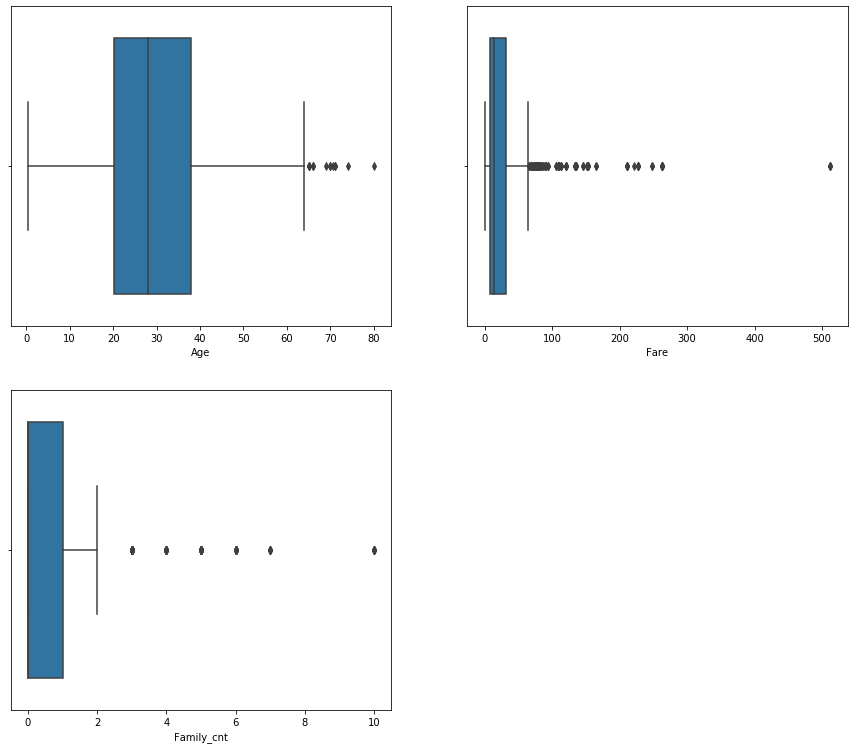

In [10]:
plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sns.boxplot(titanic_data['Age'])
plt.subplot(3,2,2)
sns.boxplot(titanic_data['Fare'])
plt.subplot(3,2,3)
sns.boxplot(titanic_data['Family_cnt'])

(878, 6)


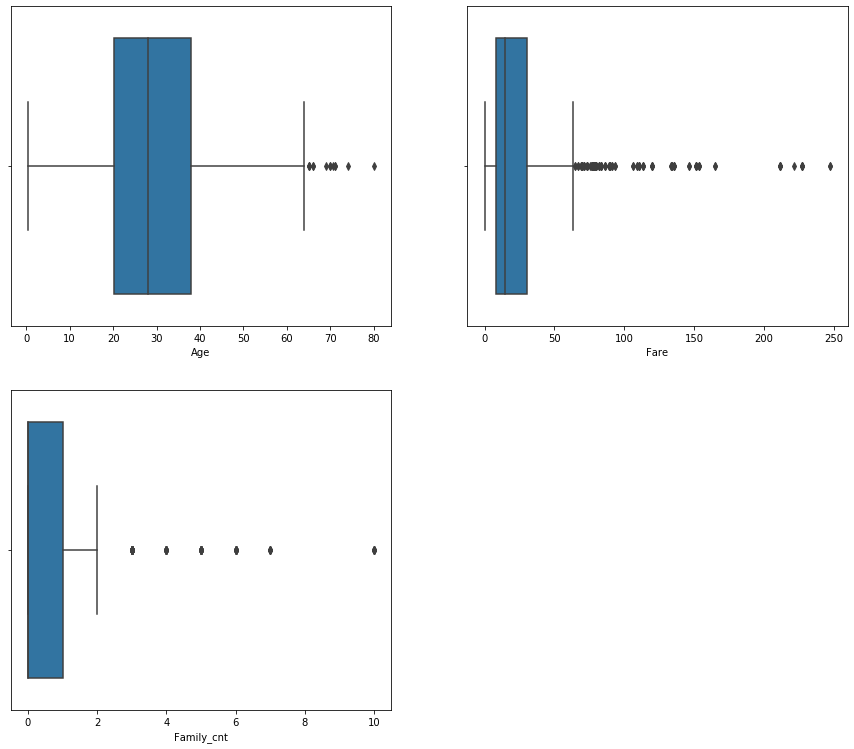

In [11]:
#Treating Outlier of Fare
q1 = titanic_data['Fare'].quantile(0.01)
q4 = titanic_data['Fare'].quantile(0.99)
titanic_data = titanic_data[(titanic_data['Fare']>=q1) & (titanic_data['Fare']<=q4)]
print(titanic_data.shape)

plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sns.boxplot(titanic_data['Age'])
plt.subplot(3,2,2)
sns.boxplot(titanic_data['Fare'])
plt.subplot(3,2,3)
sns.boxplot(titanic_data['Family_cnt'])

(871, 6)


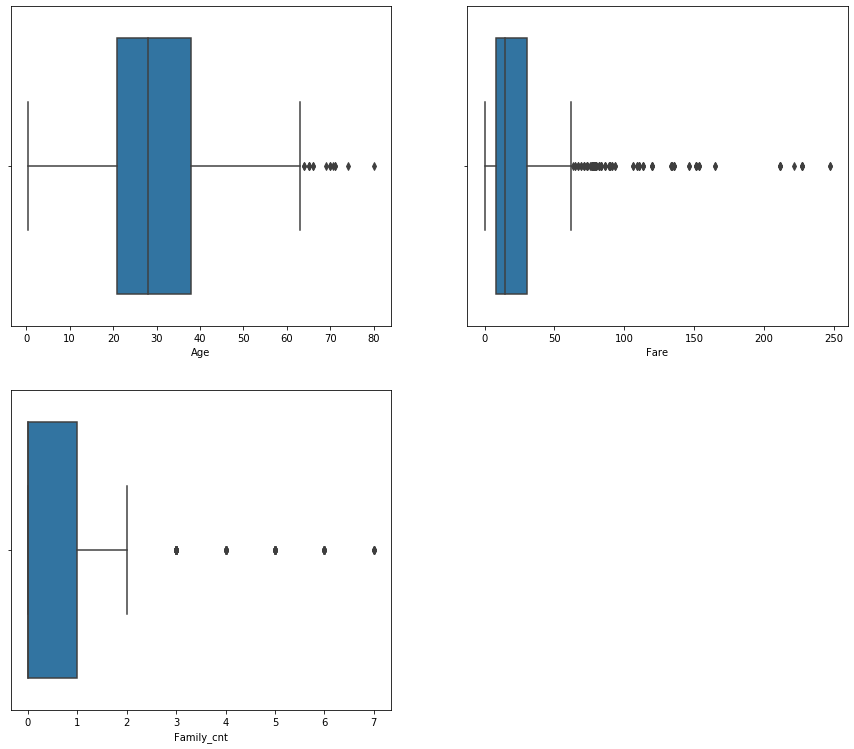

In [12]:
#Treating Outlier of Family_cnt
q1 = titanic_data['Family_cnt'].quantile(0.01)
q4 = titanic_data['Family_cnt'].quantile(0.99)
titanic_data = titanic_data[(titanic_data['Family_cnt']>=q1) & (titanic_data['Family_cnt']<=q4)]
print(titanic_data.shape)

plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sns.boxplot(titanic_data['Age'])
plt.subplot(3,2,2)
sns.boxplot(titanic_data['Fare'])
plt.subplot(3,2,3)
sns.boxplot(titanic_data['Family_cnt'])

In [13]:
100*titanic_data['Survived'].value_counts()/titanic_data.shape[0]

0    61.538462
1    38.461538
Name: Survived, dtype: float64

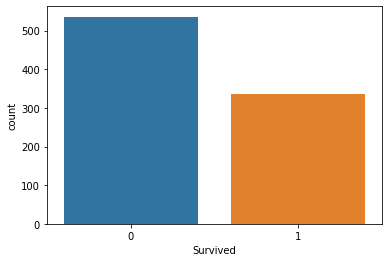

In [14]:
sns.countplot(titanic_data['Survived'])

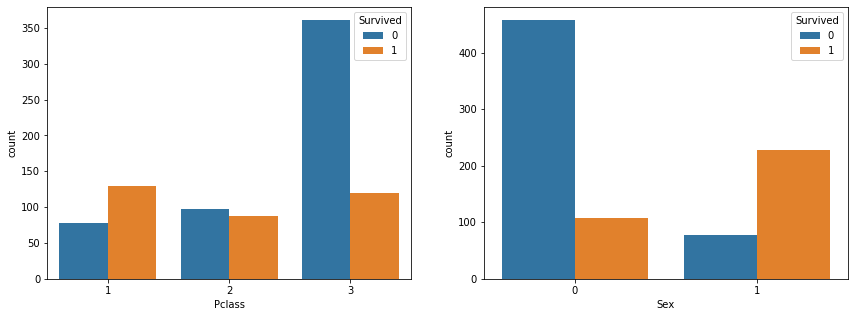

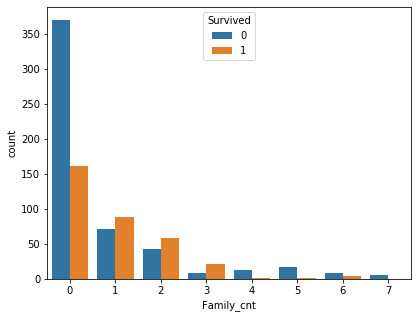

In [15]:
#Effect of Contract type , gender and own a car on Target 

plt.figure(figsize=(30,5))
plt.subplot(1,4,1)
sns.countplot(x='Pclass', hue='Survived',data=titanic_data)
plt.subplot(1,4,2)
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

plt.xticks(rotation=0)
plt.figure(figsize=(30,5))

plt.subplot(1,4,1)
sns.countplot(x='Family_cnt',hue='Survived',data=titanic_data)


/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


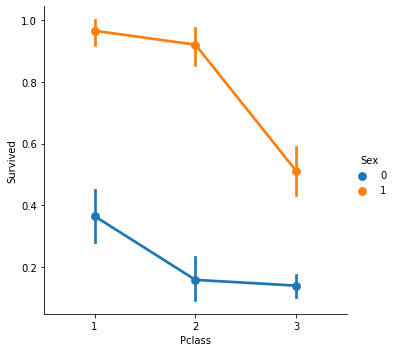

In [16]:
sns.factorplot('Pclass','Survived',hue='Sex',data=titanic_data)
plt.show()

### Predictive Models

In [17]:
titanic_data.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
Family_cnt      int64
dtype: object

In [18]:
for i in ['Pclass','Family_cnt']:
    titanic_data[i]=titanic_data[i].astype(object)

In [19]:
cat_df = titanic_data[['Pclass','Family_cnt']]
cat_df

,Pclass,Family_cnt
0,3,1
1,1,1
2,3,0
3,1,1
4,3,0
...,...,...
882,2,0
883,1,0
884,3,3
885,1,0


In [20]:
data_dummies = pd.get_dummies(cat_df, drop_first=True)
data_dummies

,Pclass_2,Pclass_3,Family_cnt_1,Family_cnt_2,Family_cnt_3,Family_cnt_4,Family_cnt_5,Family_cnt_6,Family_cnt_7
0,0,1,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
882,1,0,0,0,0,0,0,0,0
883,0,0,0,0,0,0,0,0,0
884,0,1,0,0,1,0,0,0,0
885,0,0,0,0,0,0,0,0,0


In [21]:
titanic_data.drop(list(cat_df.columns),axis=1,inplace=True)

In [22]:
titanic_data=pd.concat([titanic_data,data_dummies],axis=1)
titanic_data

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,Family_cnt_1,Family_cnt_2,Family_cnt_3,Family_cnt_4,Family_cnt_5,Family_cnt_6,Family_cnt_7
0,0,0,22.0,7.2500,0,1,1,0,0,0,0,0,0
1,1,1,38.0,71.2833,0,0,1,0,0,0,0,0,0
2,1,1,26.0,7.9250,0,1,0,0,0,0,0,0,0
3,1,1,35.0,53.1000,0,0,1,0,0,0,0,0,0
4,0,0,35.0,8.0500,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,0,27.0,13.0000,1,0,0,0,0,0,0,0,0
883,1,1,19.0,30.0000,0,0,0,0,0,0,0,0,0
884,0,1,7.0,23.4500,0,1,0,0,1,0,0,0,0
885,1,0,26.0,30.0000,0,0,0,0,0,0,0,0,0


In [23]:
## Splitting Data
from sklearn.model_selection import train_test_split
features = titanic_data.drop(['Survived'], axis=1)
target = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state = 100)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['Age','Fare']] = scaler.fit_transform(X_train[['Age','Fare']])

X_train.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Sex,Age,Fare,Pclass_2,Pclass_3,Family_cnt_1,Family_cnt_2,Family_cnt_3,Family_cnt_4,Family_cnt_5,Family_cnt_6,Family_cnt_7
164,0,-1.462102,-0.238033,0,1,0,1,0,0,0,0,0
586,0,-0.545282,-0.554218,0,1,0,0,0,0,0,0,0
529,0,-0.897905,-0.575022,0,1,0,1,0,0,0,0,0
818,0,0.583111,-0.758249,0,0,0,0,0,0,0,0,0
773,1,-1.744200,-0.442064,0,1,0,0,0,0,0,0,0


In [25]:
X_test[['Age','Fare']] = scaler.transform(X_test[['Age','Fare']])
X_test

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Sex,Age,Fare,Pclass_2,Pclass_3,Family_cnt_1,Family_cnt_2,Family_cnt_3,Family_cnt_4,Family_cnt_5,Family_cnt_6,Family_cnt_7
533,0,1.076783,-0.085326,0,0,0,0,0,0,0,0,0
399,0,-0.263184,-0.554218,0,1,0,0,0,0,0,0,0
646,1,-0.474758,-0.566891,0,1,0,0,0,0,0,0,0
118,1,-1.955773,0.034431,0,1,0,0,0,0,0,1,0
192,0,-1.885249,-0.099266,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
575,1,-0.827380,-0.391797,0,1,1,0,0,0,0,0,0
274,1,1.076783,-0.561822,0,1,0,0,0,0,0,0,0
70,1,-0.968430,0.430455,0,1,0,0,0,0,0,0,1
86,0,-0.686331,-0.554218,0,1,0,0,0,0,0,0,0


In [26]:
decision_tree = DecisionTreeClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
decision_tree.fit(X_train,y_train)
y_pred1=decision_tree.predict(X_test)
print('Decision Tree')
dt_accuracy_train = metrics.accuracy_score(y_train, decision_tree.predict(X_train))*100
dt_accuracy_test = metrics.accuracy_score(y_test, y_pred1)*100
dt_recall = metrics.recall_score(y_test, y_pred1)*100 
dt_precision = metrics.precision_score(y_test, y_pred1)*100


print("Accuracy:",metrics.accuracy_score(y_test, y_pred1)*100)
print("Recall:", metrics.recall_score(y_test, y_pred1)*100)
print("Precision:", metrics.precision_score(y_test, y_pred1)*100)


Decision Tree
Accuracy: 77.48091603053436
Recall: 59.43396226415094
Precision: 79.74683544303798


In [27]:
gradient_boost = GradientBoostingClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
gradient_boost.fit(X_train,y_train)
y_pred2=gradient_boost.predict(X_test)
print('Gradient Boosting')

gb_accuracy_train = metrics.accuracy_score(y_train, gradient_boost.predict(X_train))*100
gb_accuracy_test = metrics.accuracy_score(y_test, y_pred2)*100
gb_recall = metrics.recall_score(y_test, y_pred2)*100 
gb_precision = metrics.precision_score(y_test, y_pred2)*100


print("Accuracy:",metrics.accuracy_score(y_test, y_pred2)*100)
print("Recall:", metrics.recall_score(y_test, y_pred2)*100)
print("Precision:", metrics.precision_score(y_test, y_pred2)*100)


Gradient Boosting
Accuracy: 80.91603053435115
Recall: 64.15094339622641
Precision: 85.0


In [28]:
logistic_regression = LogisticRegression()
#Train the model using the training sets y_pred=clf.predict(X_test)
logistic_regression.fit(X_train,y_train)
y_pred3=logistic_regression.predict(X_test)
print('Logistic Regression')

lr_accuracy_train = metrics.accuracy_score(y_train, logistic_regression.predict(X_train))*100
lr_accuracy_test=metrics.accuracy_score(y_test, y_pred3)*100
lr_recall = metrics.recall_score(y_test, y_pred3)*100 
lr_precision = metrics.precision_score(y_test, y_pred3)*100

print("Accuracy:",metrics.accuracy_score(y_test, y_pred3)*100)
print("Recall:", metrics.recall_score(y_test, y_pred3)*100)
print("Precision:", metrics.precision_score(y_test, y_pred3)*100)


Logistic Regression
Accuracy: 80.91603053435115
Recall: 68.86792452830188
Precision: 81.11111111111111


In [29]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Gradient Boosting', 'Logistic Regression'],
    'Train Score':[dt_accuracy_train,gb_accuracy_train,lr_accuracy_train],
    'Test Score': [dt_accuracy_test, gb_accuracy_test, lr_accuracy_test],
    'Recall':[dt_recall, gb_recall, lr_recall],
    'Precision': [dt_precision,gb_precision,lr_precision]
})
models.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score,Recall,Precision
1,Gradient Boosting,89.655172,80.916031,64.150943,85.000000
2,Logistic Regression,81.444992,80.916031,68.867925,81.111111
0,Decision Tree,98.686371,77.480916,59.433962,79.746835


### Hyperparameter Tunning

In [30]:
from sklearn.model_selection import GridSearchCV

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std , params in zip(means , stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std *2,3),params))

In [31]:
gb = GradientBoostingClassifier()
parameters2 = {
    'n_estimators' : [5, 50, 250, 500],
    'max_depth' : [1, 3, 5, 7, 9],
    'learning_rate' : [0.01, 0.1, 1, 10, 100]
}

cv2 = GridSearchCV(gb, parameters2, cv=5)
cv2.fit(X_train, y_train.values.ravel())

print_results(cv2)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

0.624 (+/-0.004) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.793 (+/-0.071) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.793 (+/-0.071) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.8 (+/-0.066) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.004) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.79 (+/-0.034) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.819 (+/-0.034) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.818 (+/-0.054) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.004) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.787 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.814 (+/-0.083) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.811 (+/-0.058) for {'learning_rate

In [32]:
cv2.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

In [33]:
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=500)
gb = gb.fit(X_train,y_train)

In [34]:
gb_pred = gb.predict(X_test)

In [35]:
print("Accuracy_train:",metrics.accuracy_score(y_train, gb.predict(X_train))*100)
print("Accuracy:",metrics.accuracy_score(y_test, gb_pred)*100)
print("Recall:", metrics.recall_score(y_test, gb_pred)*100)
print("Precision:", metrics.precision_score(y_test, gb_pred)*100)

Accuracy_train: 85.71428571428571
Accuracy: 82.44274809160305
Recall: 66.98113207547169
Precision: 86.58536585365853


In [36]:
gb_Score_tunned_train = metrics.accuracy_score(y_train, gb.predict(X_train))*100
gb_Score_tunned_test = metrics.accuracy_score(y_test, gb_pred)*100
gb_Recall_tunned =  metrics.recall_score(y_test, gb_pred)*100
gb_Precision_tunned = metrics.precision_score(y_test, gb_pred)*100

In [37]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std , params in zip(means , stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std *2,3),params))

In [38]:
lr = LogisticRegression()
parameters4 = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv4 = GridSearchCV(lr, parameters4, cv=5)
cv4.fit(X_train, y_train.values.ravel())

print_results(cv4)

BEST PARAMS: {'C': 100}

0.624 (+/-0.004) for {'C': 0.001}
0.718 (+/-0.017) for {'C': 0.01}
0.787 (+/-0.069) for {'C': 0.1}
0.808 (+/-0.058) for {'C': 1}
0.808 (+/-0.04) for {'C': 10}
0.811 (+/-0.041) for {'C': 100}
0.811 (+/-0.046) for {'C': 1000}


In [39]:
cv4.best_params_

{'C': 100}

In [40]:
lr = LogisticRegression(C=100)
lr = lr.fit(X_train,y_train)

In [41]:
lr_pred = lr.predict(X_test)

In [42]:
print("Accuracy_train:",metrics.accuracy_score(y_train, lr.predict(X_train))*100)
print("Accuracy:",metrics.accuracy_score(y_test, lr_pred)*100)
print("Recall:", metrics.recall_score(y_test, lr_pred)*100)
print("Precision:", metrics.precision_score(y_test, lr_pred)*100)

Accuracy_train: 82.26600985221675
Accuracy: 81.67938931297711
Recall: 68.86792452830188
Precision: 82.95454545454545


In [43]:
lr_Score_tunned_train = metrics.accuracy_score(y_train, lr.predict(X_train))*100
lr_Score_tunned_test= metrics.accuracy_score(y_test, lr_pred)*100
lr_Recall_tunned = metrics.recall_score(y_test, lr_pred)*100
lr_Precision_tunned = metrics.precision_score(y_test, lr_pred)*100

In [44]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Gradient Boosting', 'Logistic Regression'],
    'Train Score':[dt_accuracy_train,gb_accuracy_train,lr_accuracy_train],
    'Test Score': [dt_accuracy_test, gb_accuracy_test, lr_accuracy_test],
    'Recall':[dt_recall, gb_recall, lr_recall],
    'Precision': [dt_precision,gb_precision,lr_precision],
    'Score Tunned Train':[0,gb_Score_tunned_train,lr_Score_tunned_train],
    'Score Tunned Test':[0, gb_Score_tunned_test, lr_Score_tunned_test],
    'Recall Tunned':[0, gb_Recall_tunned,lr_Recall_tunned],
    'Precision tunned': [0, gb_Precision_tunned,lr_Precision_tunned]
})
models.sort_values(by='Score Tunned Test', ascending=False)

,Model,Train Score,Test Score,Recall,Precision,Score Tunned Train,Score Tunned Test,Recall Tunned,Precision tunned
1,Gradient Boosting,89.655172,80.916031,64.150943,85.000000,85.714286,82.442748,66.981132,86.585366
2,Logistic Regression,81.444992,80.916031,68.867925,81.111111,82.266010,81.679389,68.867925,82.954545
0,Decision Tree,98.686371,77.480916,59.433962,79.746835,0.000000,0.000000,0.000000,0.000000
